## 0. Импорт библиотек и настройка стиля

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Настройки отображения
pd.options.display.max_columns = 100
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.facecolor'] = '#f7f7f7'
plt.rcParams['figure.facecolor'] = '#f2f2f2'

# Поднимаемся на уровень выше (из Notebooks в Home-Work-aka-DZ)
data_file = Path.cwd().parent / 'dataset_cleaned.csv'

print(f"Ищу файл в: {data_file}")
print(f"Файл существует: {data_file.exists()}")

df = pd.read_csv(data_file)

print("Размер данных:", df.shape)
print(df.head())


Ищу файл в: C:\Users\romac\Desktop\Home-Work-aka-DZ\dataset_cleaned.csv
Файл существует: True
Размер данных: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No 

## 1. Оценка структуры данных

In [35]:

df.info()
display(df.describe(include='all').T.head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Пропуски и дубликаты

Пропусков всего: 11
Дубликатов строк: 0


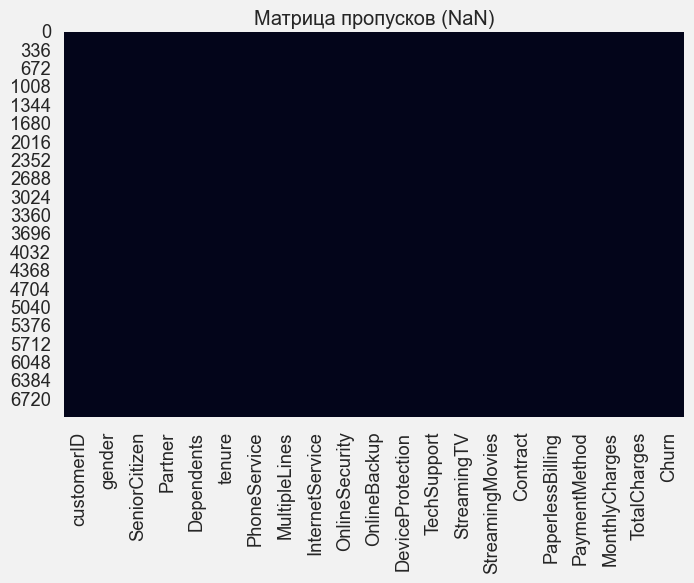

In [36]:

print("Пропусков всего:", df.isna().sum().sum())
print("Дубликатов строк:", df.duplicated().sum())
sns.heatmap(df.isna(), cbar=False)
plt.title("Матрица пропусков (NaN)")
plt.show()


## 3. Визуализация числовых признаков

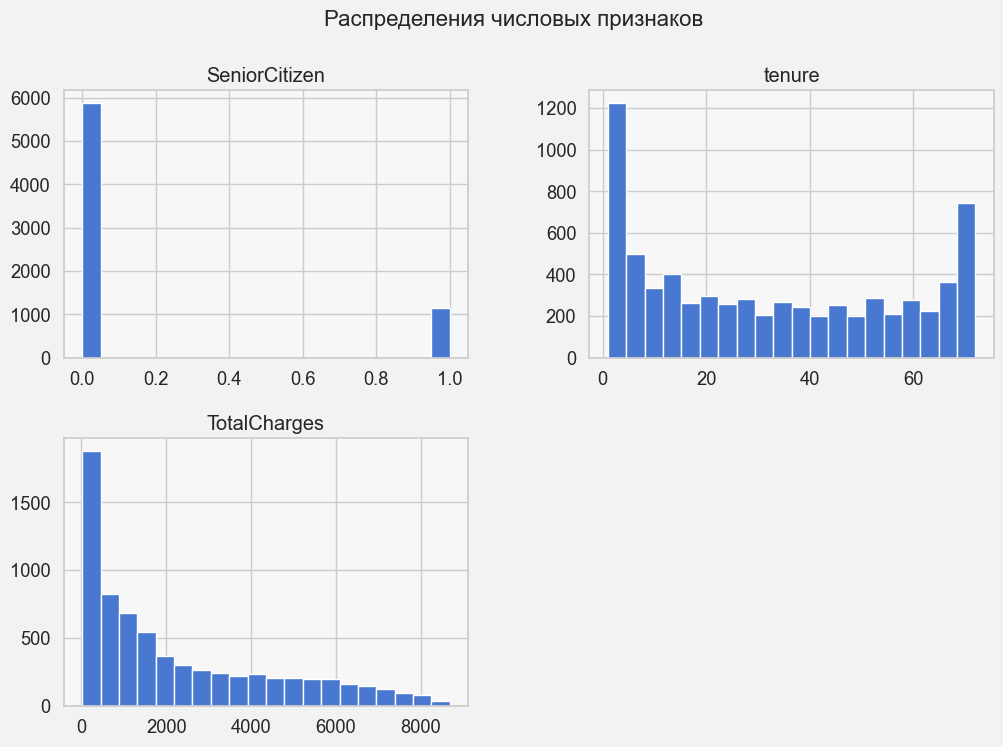

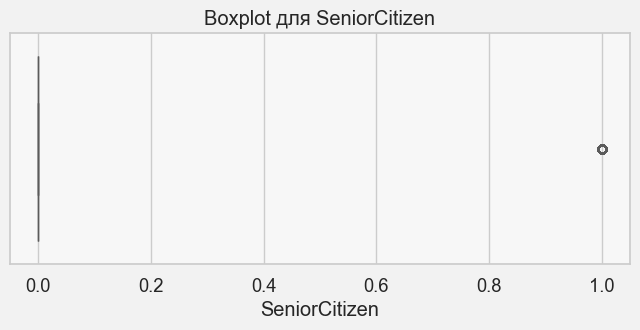

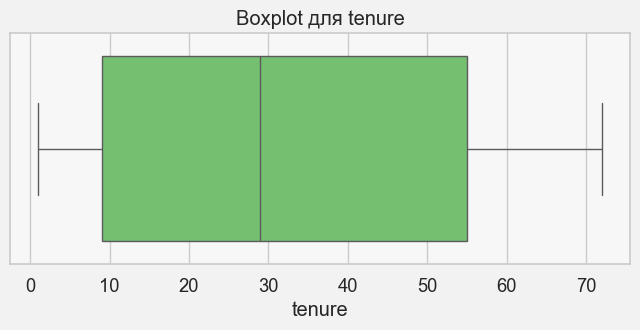

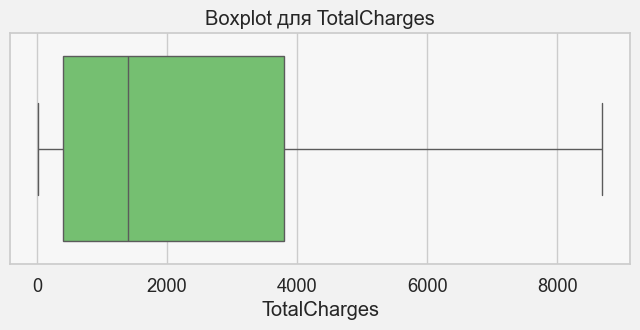

In [37]:

numeric = df.select_dtypes(include=[np.number]).dropna()

# Гистограммы
numeric.hist(bins=20, figsize=(12, 8), color=sns.color_palette("muted")[0])
plt.suptitle("Распределения числовых признаков", fontsize=16)
plt.show()

# Boxplots для выбросов
for col in numeric.columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=numeric[col], color=sns.color_palette("muted")[2])
    plt.title(f"Boxplot для {col}")
    plt.show()


## 5. Визуализация категориальных признаков

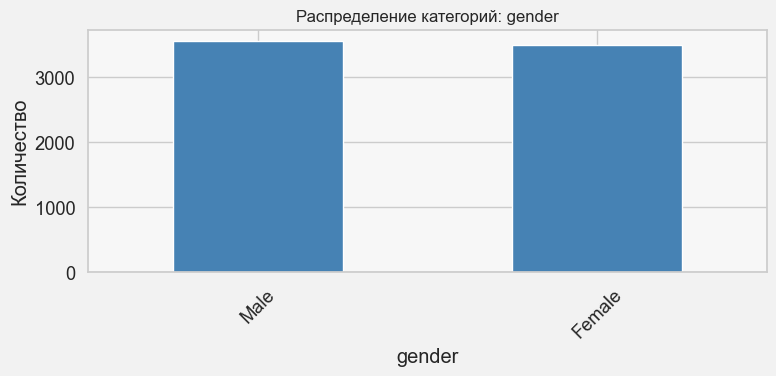

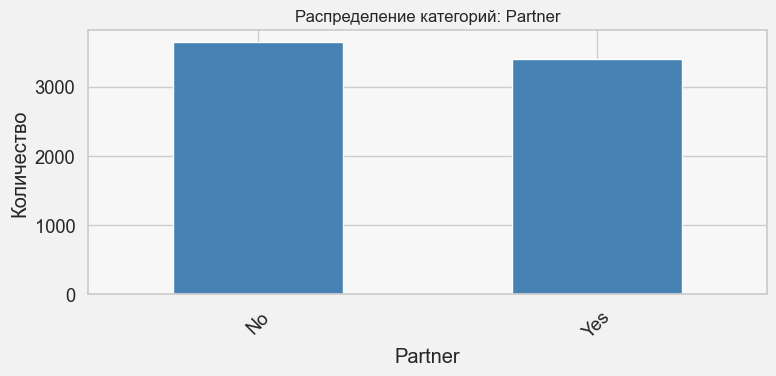

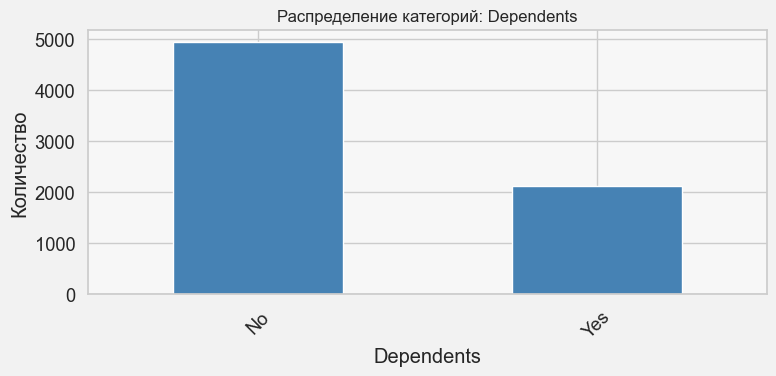

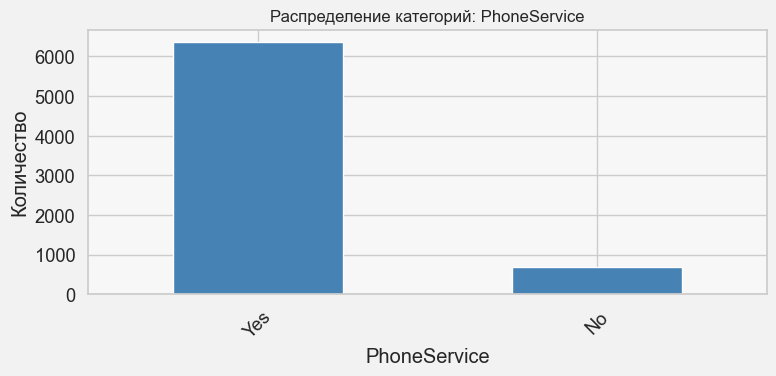

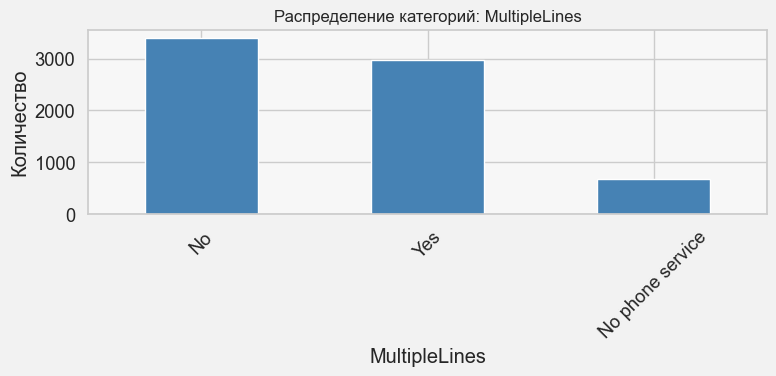

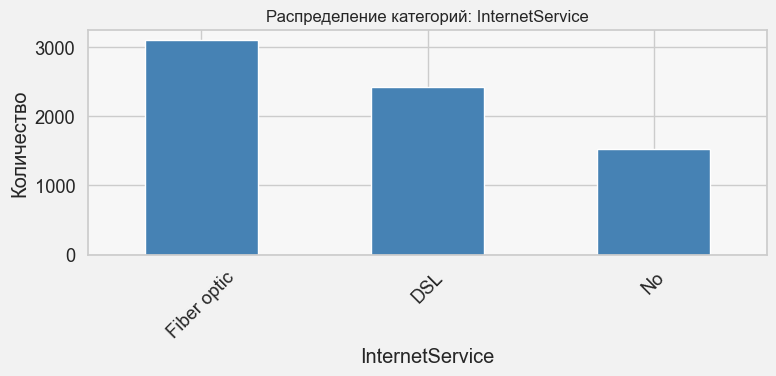

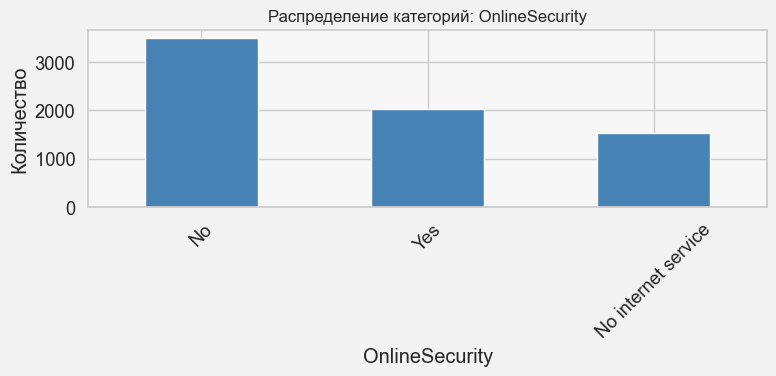

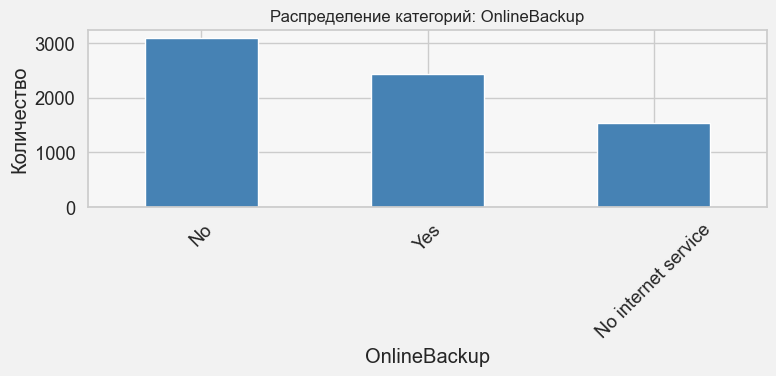

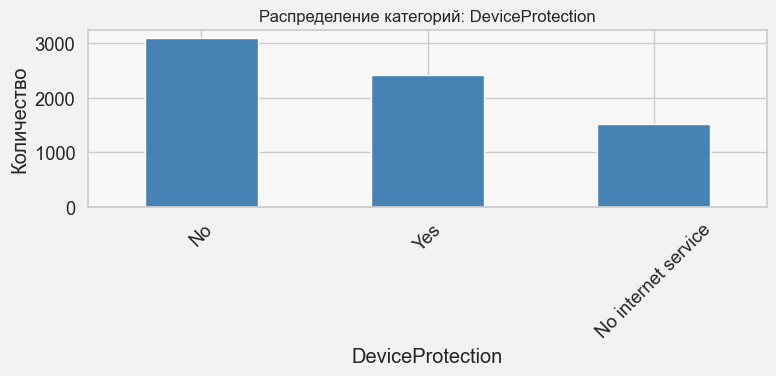

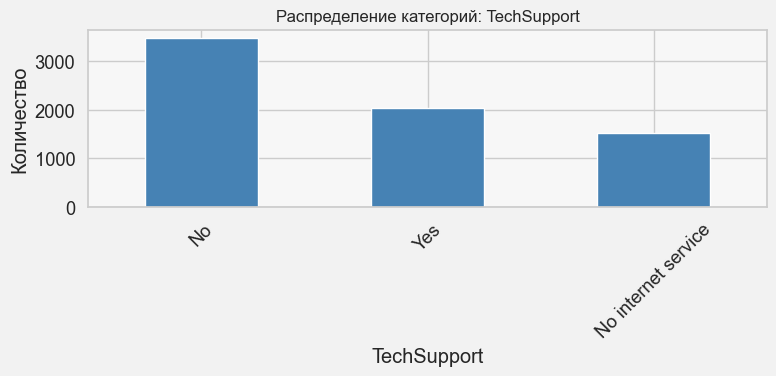

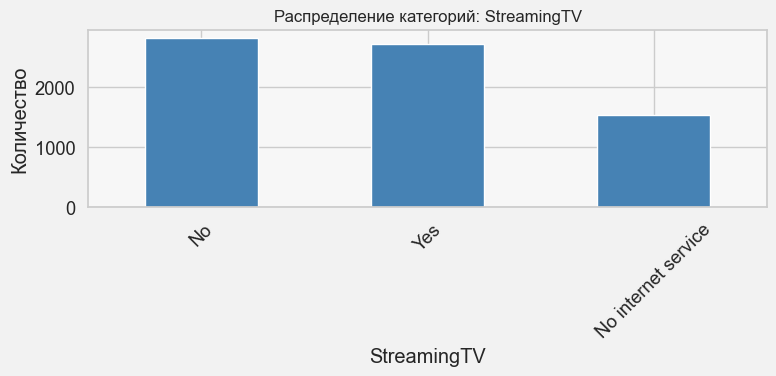

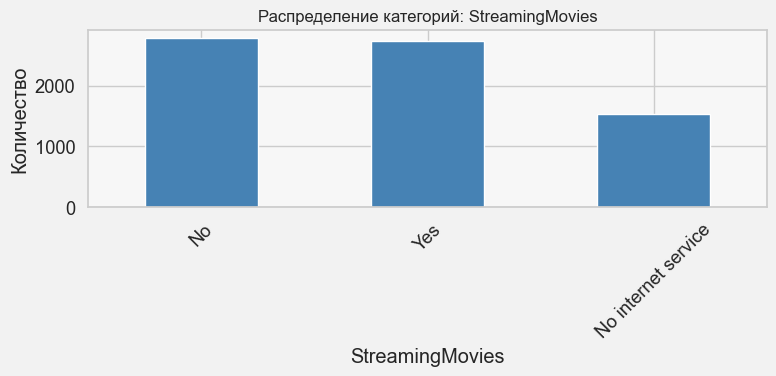

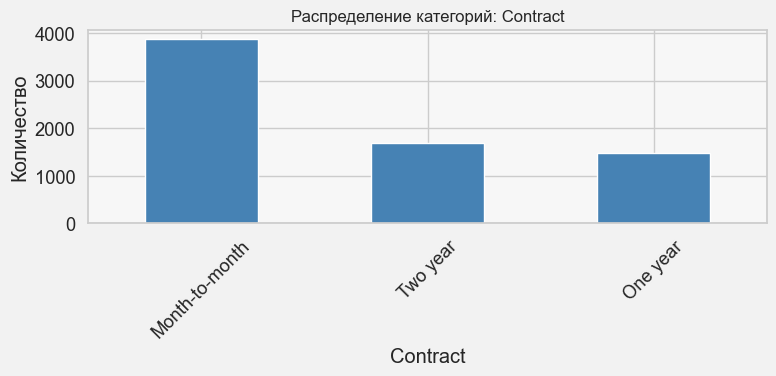

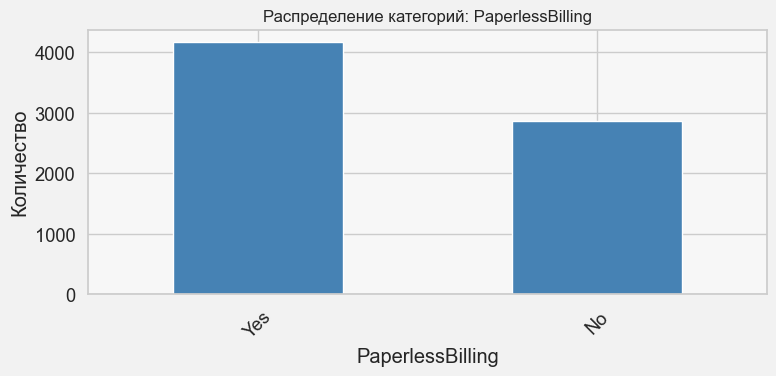

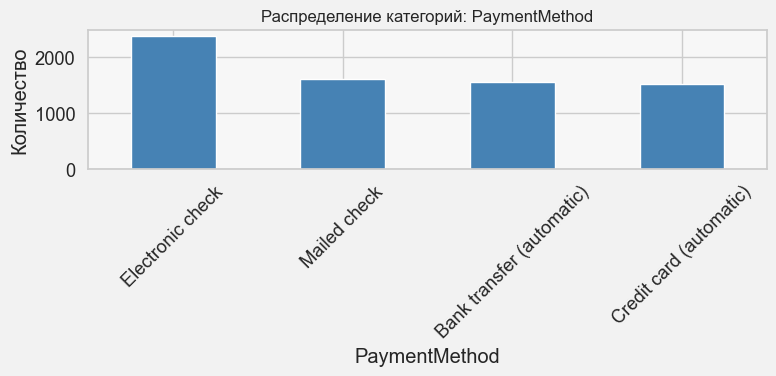

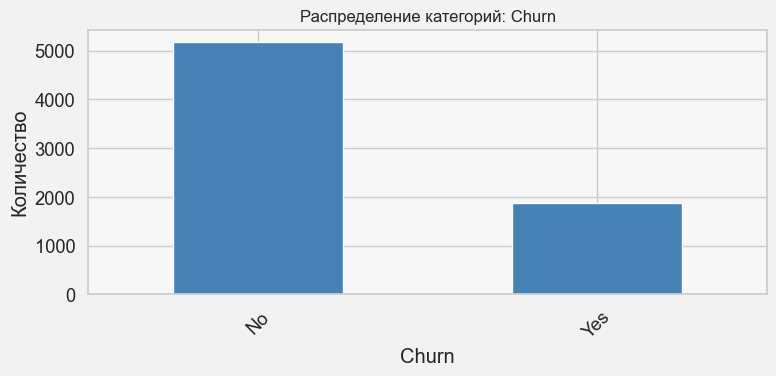

In [38]:
categorical_cols = df.select_dtypes(exclude=[np.number]).nunique()
top_cats = categorical_cols[categorical_cols < 15].index

for col in top_cats:
    fig, ax = plt.subplots(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(f"Распределение категорий: {col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Количество")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 6. Корреляция числовых признаков

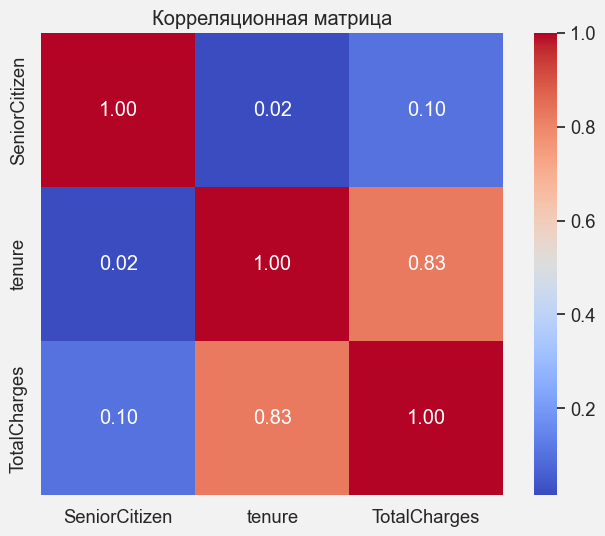

In [39]:

if numeric.shape[1] > 1:
    corr = numeric.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Корреляционная матрица")
    plt.show()
else:
    print("Недостаточно числовых признаков для корреляции.")



## 7. Выводы
- Проверена структура и целостность данных  
- Построены гистограммы, boxplots и pairplot  
- Визуализированы категориальные переменные и корреляции  
- Применён единый стиль визуализации Seaborn  
